<a href="https://colab.research.google.com/github/Taka0007/2023-seminar-previous.term/blob/main/code/phase-recovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-37c96ac26e65>:14: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


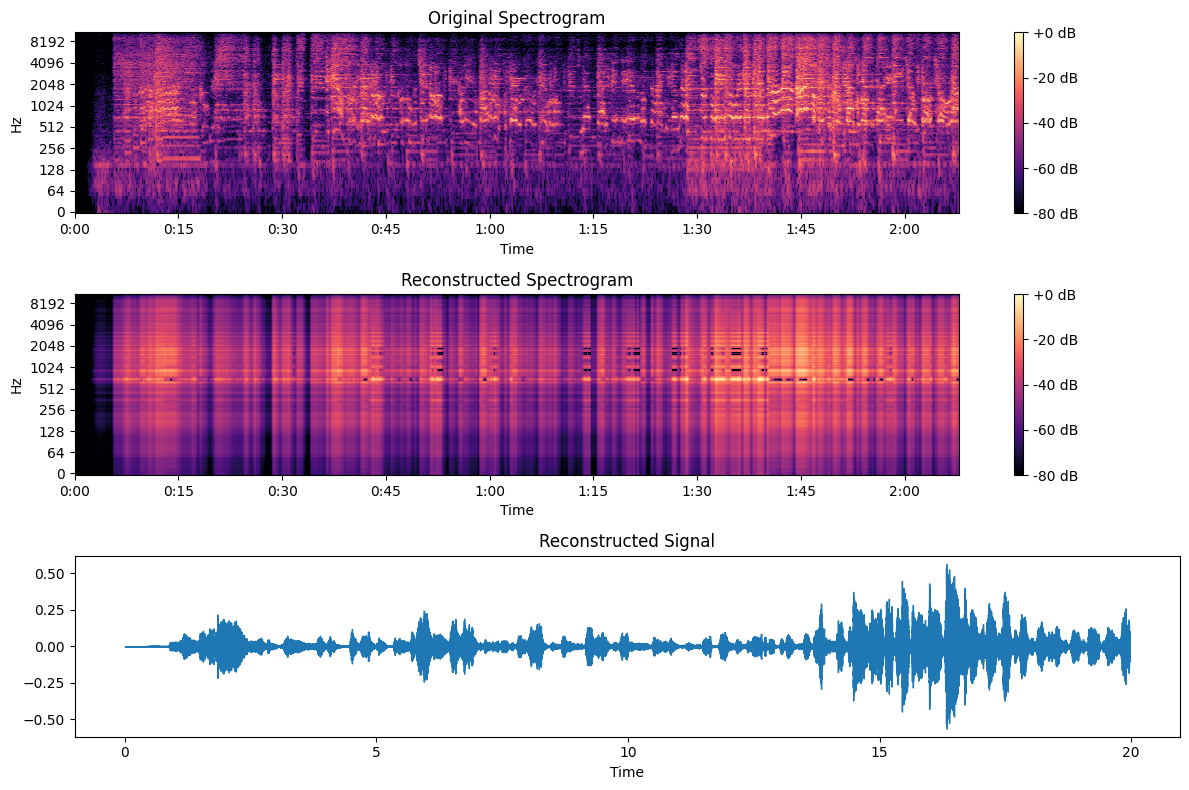

In [ ]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from numpy import linalg as LA
from sklearn.decomposition import NMF
from scipy import signal
from tqdm import tqdm
from IPython.display import Audio

# Load audio file
file_path = '/content/Vinyl-sabi.wav'
audio_data, sr = librosa.load(file_path)

# Compute the STFT
stft_matrix = librosa.stft(audio_data, n_fft=2048, hop_length=80, win_length=2048, window='hann')

# Apply NMF to obtain the magnitude spectrogram and phase
nmf_model = NMF(n_components=2)
matrix_fc = nmf_model.fit_transform(np.abs(stft_matrix))
matrix_ct = nmf_model.components_

# Reconstruct the magnitude spectrogram
reconstructed_amplitude = matrix_fc.dot(matrix_ct)

# Convert magnitude spectrogram back to complex-valued spectrogram
reconstructed_complex_spec = reconstructed_amplitude * np.exp(1j * np.angle(stft_matrix))

# Inverse STFT to obtain the time-domain signal with phase information
reconstructed_signal = librosa.istft(reconstructed_complex_spec, hop_length=80, win_length=2048, window='hann')

# Play the reconstructed signal
#librosa.output.write_wav('/content/reconstructed_signal.wav', reconstructed_signal, sr)

Audio(reconstructed_signal, rate=sr)


# Display the spectrograms
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft_matrix), ref=np.max), y_axis='log', x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Original Spectrogram')
plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(reconstructed_complex_spec), ref=np.max), y_axis='log', x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Reconstructed Spectrogram')
plt.subplot(3, 1, 3)
librosa.display.waveshow(reconstructed_signal, sr=sr)
plt.title('Reconstructed Signal')
plt.tight_layout()
plt.show()

In [ ]:
Audio(reconstructed_signal, rate=sr)

In [ ]:
Audio(audio_data, rate=sr)

In [ ]:
# Load audio file
file_path = '/content/Vinyl-sabi.wav'
audio_data, sr = librosa.load(file_path)

# Compute the STFT
stft_matrix = librosa.stft(audio_data, n_fft=2048, hop_length=80, win_length=2048, window='hann')

# Apply NMF to obtain the magnitude spectrogram and phase
nmf_model = NMF(n_components=2)
matrix_fc = nmf_model.fit_transform(np.abs(stft_matrix))
matrix_ct = nmf_model.components_

# Reconstruct the magnitude spectrograms of each source
source_amplitude1 = matrix_fc[:, 0].reshape(-1, 1).dot(matrix_ct[0, :].reshape(1, -1))
source_amplitude2 = matrix_fc[:, 1].reshape(-1, 1).dot(matrix_ct[1, :].reshape(1, -1))

# Convert magnitude spectrograms back to complex-valued spectrograms by combining with original phase information
source_complex_spec1 = source_amplitude1 * np.exp(1j * np.angle(stft_matrix))
source_complex_spec2 = source_amplitude2 * np.exp(1j * np.angle(stft_matrix))

# Inverse STFT to obtain the time-domain signals with phase information for each source
reconstructed_source1 = librosa.istft(source_complex_spec1, hop_length=80, win_length=2048, window='hann')
reconstructed_source2 = librosa.istft(source_complex_spec2, hop_length=80, win_length=2048, window='hann')

<ipython-input-4-f0dca58d472f>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [ ]:
Audio(reconstructed_source1, rate=sr)

In [ ]:
Audio(reconstructed_source2, rate=sr)